# 第3章: グラフの種類

## 学習目標
- 無向グラフ（Graph）を理解する
- 有向グラフ（DiGraph）を理解する
- マルチグラフ（MultiGraph、MultiDiGraph）を理解する
- 各グラフタイプの使い分けを習得する

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

---
## 3.1 NetworkXのグラフクラス一覧

| クラス | 自己ループ | 多重エッジ | エッジの方向 | 用途例 |
|--------|------------|------------|--------------|--------|
| `Graph` | 可能 | 不可 | なし（無向） | 友人関係、道路網 |
| `DiGraph` | 可能 | 不可 | あり（有向） | Webリンク、フォロー関係 |
| `MultiGraph` | 可能 | 可能 | なし（無向） | 複数路線の交通網 |
| `MultiDiGraph` | 可能 | 可能 | あり（有向） | 複数種類の取引関係 |

---
## 3.2 無向グラフ（Graph）

最も基本的なグラフタイプ。エッジに方向がなく、双方向の関係を表現します。

In [2]:
# 無向グラフの作成
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])

print(f"グラフタイプ: {type(G).__name__}")
print(f"有向か?: {G.is_directed()}")
print(f"エッジ一覧: {list(G.edges())}")

グラフタイプ: Graph
有向か?: False
エッジ一覧: [(1, 2), (1, 3), (1, 4), (2, 3)]


In [3]:
# 無向グラフの特徴: エッジの順序は関係ない
print(f"エッジ(1, 2)が存在: {G.has_edge(1, 2)}")
print(f"エッジ(2, 1)が存在: {G.has_edge(2, 1)}")
print("↑ 無向グラフでは (1,2) と (2,1) は同じエッジ")

エッジ(1, 2)が存在: True
エッジ(2, 1)が存在: True
↑ 無向グラフでは (1,2) と (2,1) は同じエッジ


In [4]:
# 重複エッジの追加は無視される
print(f"エッジ追加前: {G.number_of_edges()}個")
G.add_edge(1, 2)  # すでに存在するエッジ
G.add_edge(2, 1)  # 同じエッジ（方向違い）
print(f"エッジ追加後: {G.number_of_edges()}個")

エッジ追加前: 4個
エッジ追加後: 4個


In [5]:
# 自己ループ（同じノードへのエッジ）
G.add_edge(4, 4)  # 自己ループ
print(f"ノード4の自己ループ: {G.has_edge(4, 4)}")
print(f"ノード4の次数: {G.degree(4)}（自己ループは2カウント）")

ノード4の自己ループ: True
ノード4の次数: 3（自己ループは2カウント）


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IP

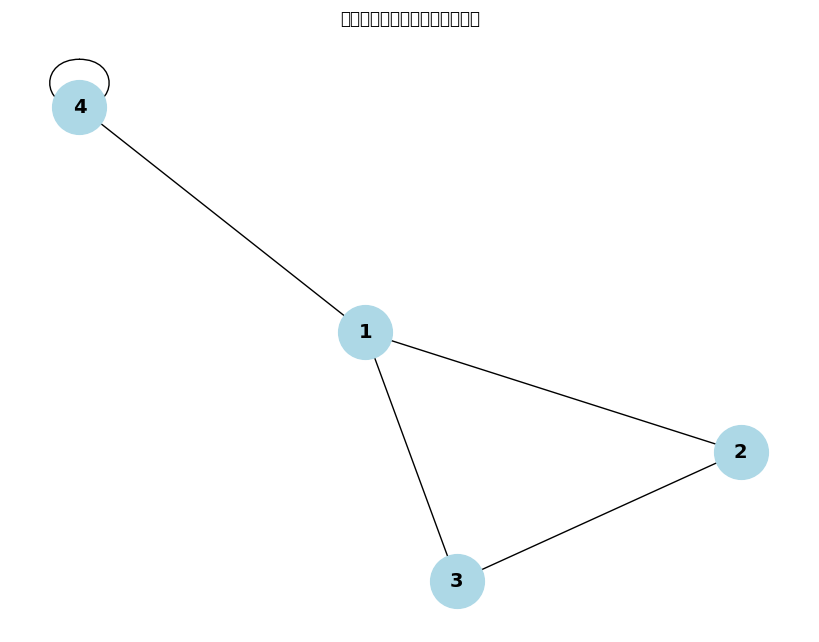

In [6]:
# 可視化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold')
plt.title("無向グラフ（自己ループ付き）")
plt.show()

---
## 3.3 有向グラフ（DiGraph）

エッジに方向があるグラフ。一方向の関係を表現します。

In [7]:
# 有向グラフの作成
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])

print(f"グラフタイプ: {type(DG).__name__}")
print(f"有向か?: {DG.is_directed()}")
print(f"エッジ一覧: {list(DG.edges())}")

グラフタイプ: DiGraph
有向か?: True
エッジ一覧: [(1, 2), (1, 4), (2, 3), (3, 1)]


In [8]:
# 有向グラフの特徴: エッジの方向が重要
print(f"エッジ(1, 2)が存在: {DG.has_edge(1, 2)}")
print(f"エッジ(2, 1)が存在: {DG.has_edge(2, 1)}")
print("↑ 有向グラフでは (1,2) と (2,1) は異なるエッジ")

エッジ(1, 2)が存在: True
エッジ(2, 1)が存在: False
↑ 有向グラフでは (1,2) と (2,1) は異なるエッジ


In [9]:
# 逆方向のエッジを追加
DG.add_edge(2, 1)  # 1→2 と 2→1 の両方が存在
print(f"エッジ一覧: {list(DG.edges())}")

エッジ一覧: [(1, 2), (1, 4), (2, 3), (2, 1), (3, 1)]


In [10]:
# 入次数（in_degree）と出次数（out_degree）
print("=== 各ノードの入次数・出次数 ===")
for node in DG.nodes():
    in_deg = DG.in_degree(node)
    out_deg = DG.out_degree(node)
    print(f"ノード {node}: 入次数={in_deg}, 出次数={out_deg}")

=== 各ノードの入次数・出次数 ===
ノード 1: 入次数=2, 出次数=2
ノード 2: 入次数=1, 出次数=2
ノード 3: 入次数=1, 出次数=1
ノード 4: 入次数=1, 出次数=0


In [11]:
# 先行ノード（predecessors）と後続ノード（successors）
print(f"\nノード2の先行ノード（2に向かうエッジの始点）: {list(DG.predecessors(2))}")
print(f"ノード2の後続ノード（2から出るエッジの終点）: {list(DG.successors(2))}")


ノード2の先行ノード（2に向かうエッジの始点）: [1]
ノード2の後続ノード（2から出るエッジの終点）: [3, 1]


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


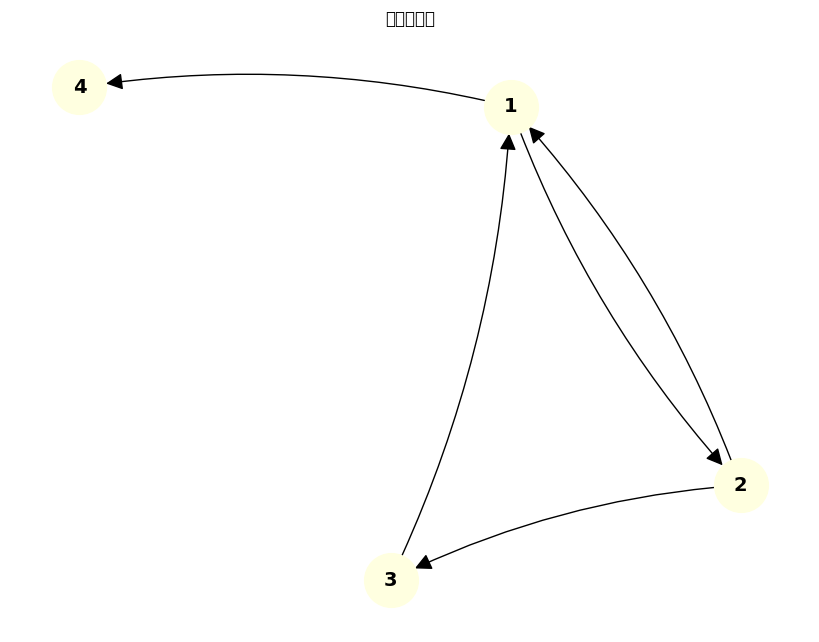

In [12]:
# 可視化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG, seed=42)
nx.draw(DG, pos, with_labels=True, node_color='lightyellow',
        node_size=1500, font_size=14, font_weight='bold',
        arrows=True, arrowsize=25, connectionstyle="arc3,rad=0.1")
plt.title("有向グラフ")
plt.show()

---
## 3.4 マルチグラフ（MultiGraph）

同じノード間に複数のエッジを持つことができる無向グラフ。

In [13]:
# マルチグラフの作成
MG = nx.MultiGraph()

# 同じノード間に複数のエッジを追加
MG.add_edge('Tokyo', 'Osaka', route='新幹線', time=2.5)
MG.add_edge('Tokyo', 'Osaka', route='飛行機', time=1.0)
MG.add_edge('Tokyo', 'Osaka', route='夜行バス', time=8.0)
MG.add_edge('Tokyo', 'Nagoya', route='新幹線', time=1.5)

print(f"ノード: {list(MG.nodes())}")
print(f"エッジ数: {MG.number_of_edges()}")

ノード: ['Tokyo', 'Osaka', 'Nagoya']
エッジ数: 4


In [14]:
# エッジの詳細を確認（キー付き）
print("=== 全エッジ詳細 ===")
for u, v, key, data in MG.edges(keys=True, data=True):
    print(f"  {u} - {v} (key={key}): {data}")

=== 全エッジ詳細 ===
  Tokyo - Osaka (key=0): {'route': '新幹線', 'time': 2.5}
  Tokyo - Osaka (key=1): {'route': '飛行機', 'time': 1.0}
  Tokyo - Osaka (key=2): {'route': '夜行バス', 'time': 8.0}
  Tokyo - Nagoya (key=0): {'route': '新幹線', 'time': 1.5}


In [15]:
# 特定のノード間のエッジ数
print(f"\nTokyo-Osaka間のエッジ数: {MG.number_of_edges('Tokyo', 'Osaka')}")


Tokyo-Osaka間のエッジ数: 3


In [16]:
# エッジの取得方法
print("\n=== Tokyo-Osaka間の全ルート ===")
for key, data in MG['Tokyo']['Osaka'].items():
    print(f"  {data['route']}: {data['time']}時間")


=== Tokyo-Osaka間の全ルート ===
  新幹線: 2.5時間
  飛行機: 1.0時間
  夜行バス: 8.0時間


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/

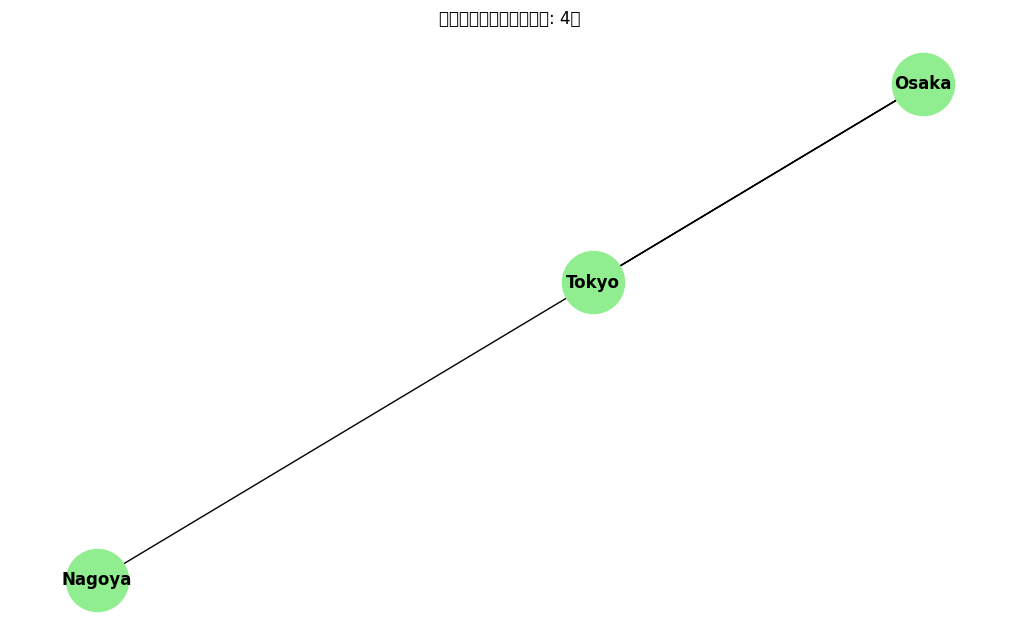

In [17]:
# 可視化（複数エッジは重なって表示される）
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(MG, seed=42)
nx.draw(MG, pos, with_labels=True, node_color='lightgreen',
        node_size=2000, font_size=12, font_weight='bold')
plt.title(f"マルチグラフ（エッジ数: {MG.number_of_edges()}）")
plt.show()

---
## 3.5 有向マルチグラフ（MultiDiGraph）

同じノード間に複数の有向エッジを持つことができるグラフ。

In [18]:
# 有向マルチグラフの作成
MDG = nx.MultiDiGraph()

# 会社間の取引関係を表現
MDG.add_edge('A社', 'B社', type='商品販売', amount=1000000)
MDG.add_edge('A社', 'B社', type='サービス提供', amount=500000)
MDG.add_edge('B社', 'A社', type='部品供給', amount=300000)
MDG.add_edge('B社', 'C社', type='商品販売', amount=800000)
MDG.add_edge('C社', 'A社', type='コンサルティング', amount=200000)

print(f"ノード（会社）: {list(MDG.nodes())}")
print(f"取引数: {MDG.number_of_edges()}")

ノード（会社）: ['A社', 'B社', 'C社']
取引数: 5


In [19]:
# 全取引の詳細
print("=== 全取引詳細 ===")
for u, v, key, data in MDG.edges(keys=True, data=True):
    print(f"  {u} → {v}: {data['type']} ({data['amount']:,}円)")

=== 全取引詳細 ===
  A社 → B社: 商品販売 (1,000,000円)
  A社 → B社: サービス提供 (500,000円)
  B社 → A社: 部品供給 (300,000円)
  B社 → C社: 商品販売 (800,000円)
  C社 → A社: コンサルティング (200,000円)


In [20]:
# 各会社の取引状況
print("\n=== 各会社の取引状況 ===")
for company in MDG.nodes():
    # 販売（出力）
    sales = sum(data['amount'] for _, _, data in MDG.out_edges(company, data=True))
    # 仕入（入力）
    purchases = sum(data['amount'] for _, _, data in MDG.in_edges(company, data=True))
    print(f"{company}: 販売 {sales:,}円, 仕入 {purchases:,}円, 差額 {sales-purchases:+,}円")


=== 各会社の取引状況 ===
A社: 販売 1,500,000円, 仕入 500,000円, 差額 +1,000,000円
B社: 販売 1,100,000円, 仕入 1,500,000円, 差額 -400,000円
C社: 販売 200,000円, 仕入 800,000円, 差額 -600,000円


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/

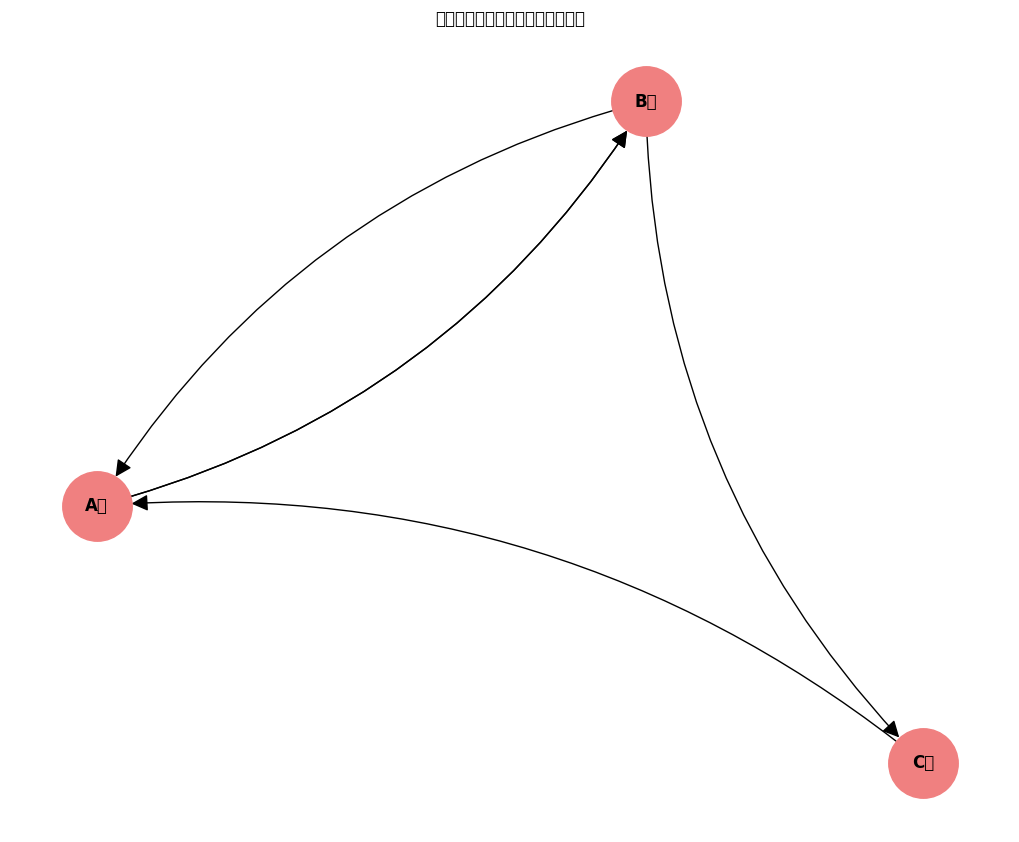

In [21]:
# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(MDG, seed=42)
nx.draw(MDG, pos, with_labels=True, node_color='lightcoral',
        node_size=2500, font_size=12, font_weight='bold',
        arrows=True, arrowsize=25,
        connectionstyle="arc3,rad=0.2")
plt.title("有向マルチグラフ（会社間取引）")
plt.show()

---
## 3.6 グラフタイプの変換

In [22]:
# 無向グラフから有向グラフへ
G = nx.Graph([(1, 2), (2, 3), (3, 1)])
DG = G.to_directed()

print("=== 無向 → 有向 ===")
print(f"元のエッジ: {list(G.edges())}")
print(f"変換後: {list(DG.edges())}")
print("（各エッジが双方向に展開される）")

=== 無向 → 有向 ===
元のエッジ: [(1, 2), (1, 3), (2, 3)]
変換後: [(1, 2), (1, 3), (2, 1), (2, 3), (3, 2), (3, 1)]
（各エッジが双方向に展開される）


In [23]:
# 有向グラフから無向グラフへ
DG2 = nx.DiGraph([(1, 2), (2, 3), (3, 1), (1, 3)])
G2 = DG2.to_undirected()

print("\n=== 有向 → 無向 ===")
print(f"元のエッジ: {list(DG2.edges())}")
print(f"変換後: {list(G2.edges())}")


=== 有向 → 無向 ===
元のエッジ: [(1, 2), (1, 3), (2, 3), (3, 1)]
変換後: [(1, 2), (1, 3), (2, 3)]


In [24]:
# マルチグラフから通常のグラフへ（エッジは1つに統合）
MG = nx.MultiGraph()
MG.add_edges_from([(1, 2), (1, 2), (1, 2), (2, 3)])
G3 = nx.Graph(MG)

print("\n=== マルチグラフ → 通常グラフ ===")
print(f"マルチグラフのエッジ数: {MG.number_of_edges()}")
print(f"通常グラフのエッジ数: {G3.number_of_edges()}")


=== マルチグラフ → 通常グラフ ===
マルチグラフのエッジ数: 4
通常グラフのエッジ数: 2


---
## 例題1: Webページのリンク構造

Webページ間のリンク関係を有向グラフで表現し、分析します。

In [25]:
# Webサイトのリンク構造
web = nx.DiGraph()

pages = [
    ('トップ', 'ニュース'),
    ('トップ', '製品'),
    ('トップ', '会社概要'),
    ('ニュース', 'トップ'),
    ('ニュース', '製品'),
    ('製品', 'トップ'),
    ('製品', '製品A'),
    ('製品', '製品B'),
    ('製品A', '製品'),
    ('製品A', '製品B'),
    ('製品B', '製品'),
    ('会社概要', 'トップ'),
    ('会社概要', '採用'),
    ('採用', '会社概要'),
    ('採用', 'トップ')
]
web.add_edges_from(pages)

print(f"ページ数: {web.number_of_nodes()}")
print(f"リンク数: {web.number_of_edges()}")

ページ数: 7
リンク数: 15


In [26]:
# 各ページの被リンク数（入次数）
print("=== 各ページの被リンク数（人気度） ===")
for page in sorted(web.nodes(), key=lambda x: web.in_degree(x), reverse=True):
    print(f"  {page}: {web.in_degree(page)}リンク")

=== 各ページの被リンク数（人気度） ===
  トップ: 4リンク
  製品: 4リンク
  会社概要: 2リンク
  製品B: 2リンク
  ニュース: 1リンク
  製品A: 1リンク
  採用: 1リンク


In [27]:
# トップページから到達可能なページ
reachable = nx.descendants(web, 'トップ')
print(f"\nトップから到達可能なページ: {reachable}")


トップから到達可能なページ: {'製品B', '製品', '製品A', 'ニュース', '会社概要', '採用'}


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabt

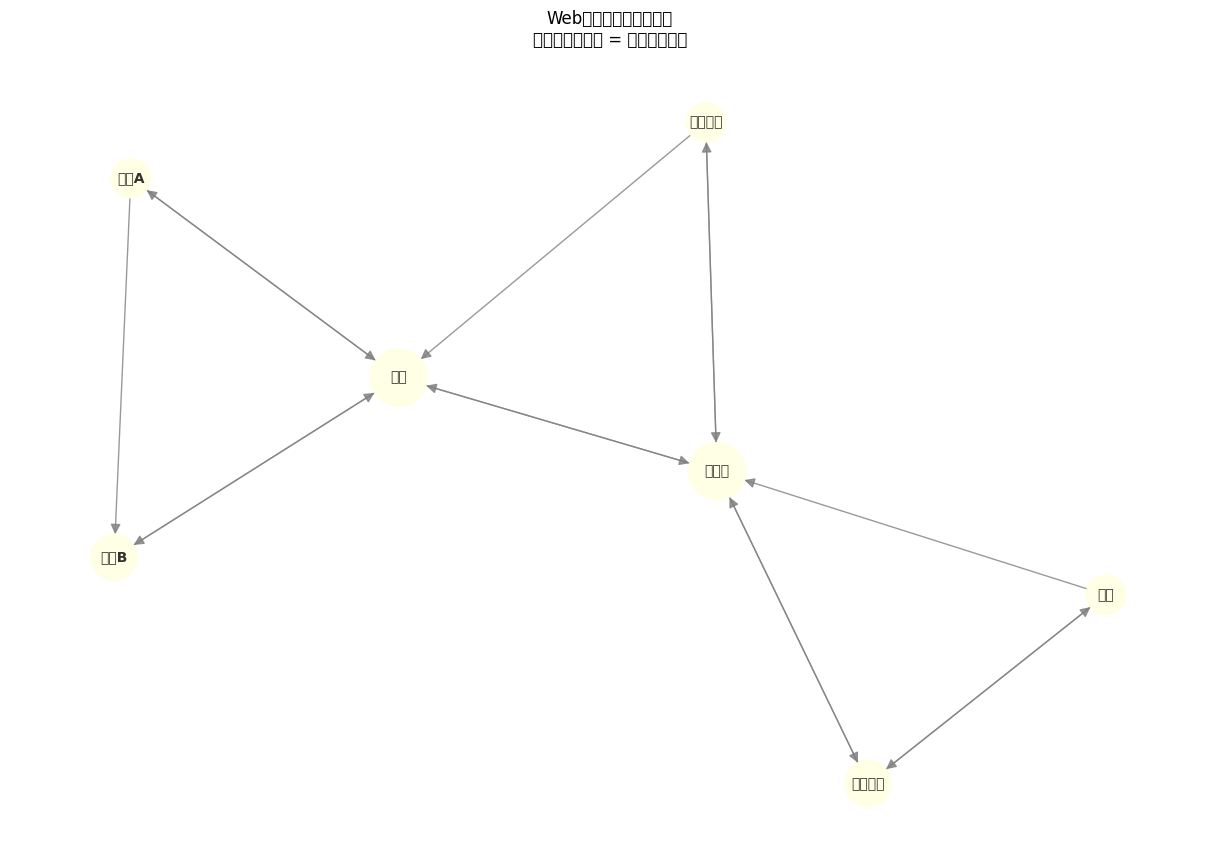

In [28]:
# 可視化
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(web)

# ノードサイズを被リンク数に比例
node_sizes = [500 + web.in_degree(n) * 300 for n in web.nodes()]

nx.draw(web, pos, with_labels=True, node_color='lightyellow',
        node_size=node_sizes, font_size=10, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='gray', alpha=0.8)
plt.title("Webサイトのリンク構造\n（ノードサイズ = 被リンク数）")
plt.show()

---
## 例題2: 交通ネットワーク（マルチグラフ）

複数の交通手段がある路線をマルチグラフで表現します。

In [29]:
# 東京の交通ネットワーク
transport = nx.MultiGraph()

# 各路線データ
routes = [
    ('東京', '上野', 'JR山手線', 5, 160),
    ('東京', '上野', '東京メトロ銀座線', 7, 170),
    ('東京', '新宿', 'JR中央線', 14, 200),
    ('東京', '新宿', '東京メトロ丸ノ内線', 20, 200),
    ('上野', '池袋', 'JR山手線', 15, 170),
    ('新宿', '池袋', 'JR山手線', 6, 160),
    ('新宿', '池袋', '西武新宿線', 10, 180),
    ('新宿', '渋谷', 'JR山手線', 7, 160),
    ('新宿', '渋谷', '東京メトロ副都心線', 6, 170),
    ('渋谷', '池袋', 'JR山手線', 15, 200),
    ('渋谷', '池袋', '東京メトロ副都心線', 16, 210)
]

for src, dst, line, time, fare in routes:
    transport.add_edge(src, dst, line=line, time=time, fare=fare)

In [30]:
print(f"駅数: {transport.number_of_nodes()}")
print(f"路線数（エッジ数）: {transport.number_of_edges()}")

駅数: 5
路線数（エッジ数）: 11


In [31]:
# 東京-新宿間の全ルート
print("=== 東京-新宿間の移動手段 ===")
for key, data in transport['東京']['新宿'].items():
    print(f"  {data['line']}: {data['time']}分, {data['fare']}円")

=== 東京-新宿間の移動手段 ===
  JR中央線: 14分, 200円
  東京メトロ丸ノ内線: 20分, 200円


In [32]:
# 最安値ルートを見つける関数
def find_cheapest_route(G, src, dst):
    """2駅間の最安値ルートを見つける"""
    if not G.has_edge(src, dst):
        return None
    
    edges = G[src][dst]
    cheapest = min(edges.values(), key=lambda x: x['fare'])
    return cheapest

# 各区間の最安値ルート
print("\n=== 各区間の最安値ルート ===")
for src, dst in [('東京', '新宿'), ('新宿', '池袋'), ('渋谷', '池袋')]:
    route = find_cheapest_route(transport, src, dst)
    if route:
        print(f"{src}-{dst}: {route['line']} ({route['fare']}円)")


=== 各区間の最安値ルート ===
東京-新宿: JR中央線 (200円)
新宿-池袋: JR山手線 (160円)
渋谷-池袋: JR山手線 (200円)


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/

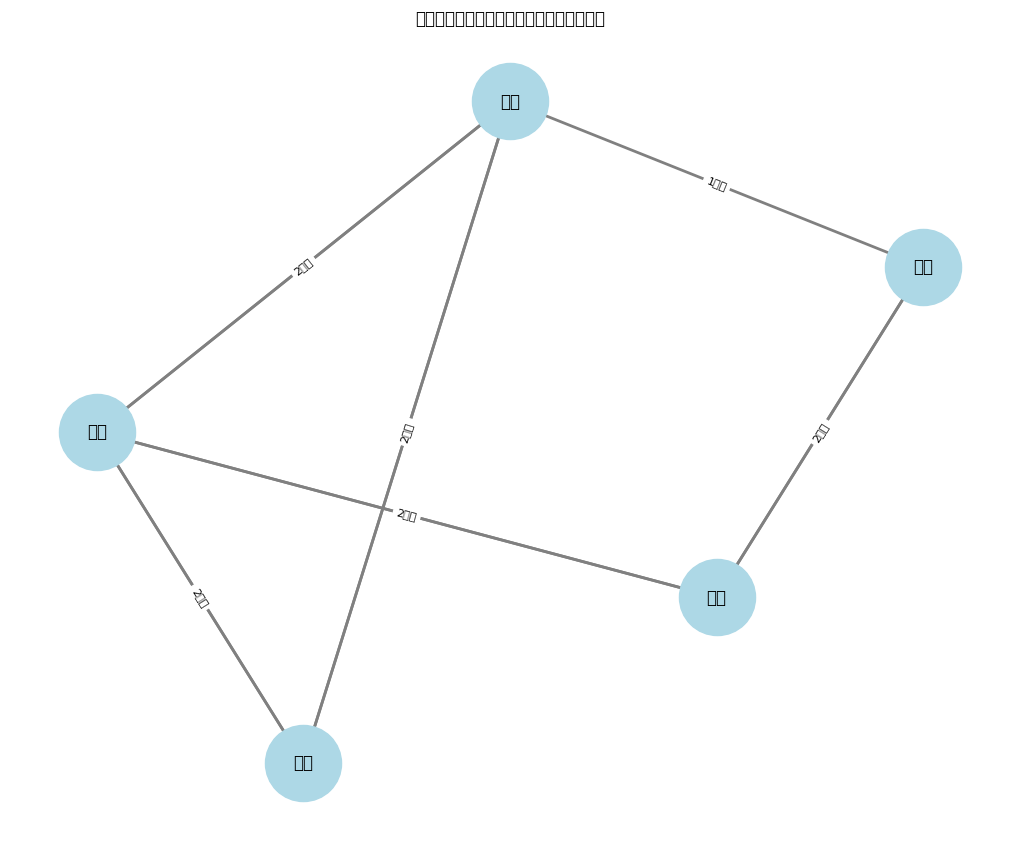

In [33]:
# 可視化
plt.figure(figsize=(10, 8))
pos = {
    '東京': (1, 0),
    '上野': (1.5, 1),
    '池袋': (0.5, 1.5),
    '新宿': (-0.5, 0.5),
    '渋谷': (0, -0.5)
}

nx.draw(transport, pos, with_labels=True, node_color='lightblue',
        node_size=3000, font_size=12, font_weight='bold',
        width=2, edge_color='gray')

# エッジラベル（路線数）
edge_labels = {}
for u, v in set(transport.edges()):
    count = transport.number_of_edges(u, v)
    edge_labels[(u, v)] = f"{count}路線"
nx.draw_networkx_edge_labels(transport, pos, edge_labels=edge_labels, font_size=8)

plt.title("東京の交通ネットワーク（マルチグラフ）")
plt.axis('off')
plt.show()

---
## 練習問題

### 練習問題1: メール送受信ネットワーク

以下のメール送受信データを有向グラフで表現し、分析してください。

| 送信者 | 受信者 |
|--------|--------|
| Alice | Bob |
| Alice | Charlie |
| Bob | Alice |
| Bob | Diana |
| Charlie | Alice |
| Charlie | Bob |
| Diana | Charlie |

1. 有向グラフを作成
2. 各人の送信数と受信数を計算
3. 相互にメールを送り合っているペアを見つける
4. グラフを可視化

In [34]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 有向グラフの作成
mail = nx.DiGraph()
mail.add_edges_from([
    ('Alice', 'Bob'),
    ('Alice', 'Charlie'),
    ('Bob', 'Alice'),
    ('Bob', 'Diana'),
    ('Charlie', 'Alice'),
    ('Charlie', 'Bob'),
    ('Diana', 'Charlie')
])

# 各人の送信数と受信数
print("=== 各人の送受信数 ===")
for person in mail.nodes():
    sent = mail.out_degree(person)
    received = mail.in_degree(person)
    print(f"{person}: 送信 {sent}通, 受信 {received}通")

# 相互にメールを送り合っているペア
print("\n=== 相互にメールを送り合っているペア ===")
mutual_pairs = []
for u, v in mail.edges():
    if mail.has_edge(v, u) and (v, u) not in mutual_pairs:
        mutual_pairs.append((u, v))
        print(f"  {u} ⇔ {v}")

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(mail, seed=42)

# ノードサイズを送信数に比例
node_sizes = [500 + mail.out_degree(n) * 400 for n in mail.nodes()]

nx.draw(mail, pos, with_labels=True, node_color='lightcoral',
        node_size=node_sizes, font_size=12, font_weight='bold',
        arrows=True, arrowsize=25, connectionstyle="arc3,rad=0.1")
plt.title("メール送受信ネットワーク\n（ノードサイズ = 送信数）")
plt.show()
```
</details>

### 練習問題2: 航空ネットワーク（マルチグラフ）

以下の航空路線データをマルチグラフで表現してください。

| 出発 | 到着 | 航空会社 | 所要時間(分) | 料金(円) |
|------|------|----------|--------------|----------|
| 羽田 | 札幌 | JAL | 90 | 30000 |
| 羽田 | 札幌 | ANA | 95 | 28000 |
| 羽田 | 札幌 | Skymark | 100 | 15000 |
| 羽田 | 大阪 | JAL | 65 | 22000 |
| 羽田 | 大阪 | ANA | 70 | 20000 |
| 札幌 | 大阪 | JAL | 120 | 35000 |

1. マルチグラフを作成
2. 羽田-札幌間の全路線と最安値路線を表示
3. 各空港の就航路線数（エッジ数）を計算

In [35]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# マルチグラフの作成
flights = nx.MultiGraph()

flight_data = [
    ('羽田', '札幌', 'JAL', 90, 30000),
    ('羽田', '札幌', 'ANA', 95, 28000),
    ('羽田', '札幌', 'Skymark', 100, 15000),
    ('羽田', '大阪', 'JAL', 65, 22000),
    ('羽田', '大阪', 'ANA', 70, 20000),
    ('札幌', '大阪', 'JAL', 120, 35000)
]

for src, dst, airline, time, fare in flight_data:
    flights.add_edge(src, dst, airline=airline, time=time, fare=fare)

print(f"空港数: {flights.number_of_nodes()}")
print(f"路線数: {flights.number_of_edges()}")

# 羽田-札幌間の全路線
print("\n=== 羽田-札幌間の全路線 ===")
for key, data in flights['羽田']['札幌'].items():
    print(f"  {data['airline']}: {data['time']}分, {data['fare']:,}円")

# 最安値路線
cheapest = min(flights['羽田']['札幌'].values(), key=lambda x: x['fare'])
print(f"\n最安値: {cheapest['airline']} ({cheapest['fare']:,}円)")

# 各空港の就航路線数
print("\n=== 各空港の就航路線数 ===")
for airport in flights.nodes():
    edge_count = flights.degree(airport)
    print(f"  {airport}: {edge_count}路線")

# 可視化
plt.figure(figsize=(10, 6))
pos = {'羽田': (0, 0), '札幌': (1, 1), '大阪': (-1, 1)}
nx.draw(flights, pos, with_labels=True, node_color='lightyellow',
        node_size=3000, font_size=12, font_weight='bold')

edge_labels = {(u, v): f"{flights.number_of_edges(u, v)}便" for u, v in set(flights.edges())}
nx.draw_networkx_edge_labels(flights, pos, edge_labels=edge_labels)

plt.title("航空ネットワーク")
plt.show()
```
</details>

### 練習問題3: グラフ変換の理解

以下の操作を行い、結果を確認してください。

1. 5ノードの完全グラフ（K5）を作成
2. 有向グラフに変換し、エッジ数の変化を確認
3. 元の無向グラフに戻し、エッジ数を確認
4. なぜそのような変化が起きるか考察

In [36]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 1. 完全グラフK5の作成
K5 = nx.complete_graph(5)
print(f"K5（無向）のエッジ数: {K5.number_of_edges()}")
print(f"K5のエッジ: {list(K5.edges())}")

# 2. 有向グラフに変換
K5_directed = K5.to_directed()
print(f"\nK5（有向）のエッジ数: {K5_directed.number_of_edges()}")
print(f"K5（有向）のエッジ: {list(K5_directed.edges())}")

# 3. 無向グラフに戻す
K5_undirected = K5_directed.to_undirected()
print(f"\n戻した無向グラフのエッジ数: {K5_undirected.number_of_edges()}")

# 4. 考察
print("\n=== 考察 ===")
print(f"無向グラフ → 有向グラフ: エッジ数が {K5.number_of_edges()} → {K5_directed.number_of_edges()} に増加")
print("理由: 各無向エッジが双方向（2本）の有向エッジに展開されるため")
print(f"\n有向グラフ → 無向グラフ: エッジ数が {K5_directed.number_of_edges()} → {K5_undirected.number_of_edges()} に減少")
print("理由: 双方向のエッジが1本の無向エッジに統合されるため")

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pos = nx.circular_layout(K5)

axes[0].set_title(f"K5（無向）\nエッジ数: {K5.number_of_edges()}")
nx.draw(K5, pos, ax=axes[0], with_labels=True, node_color='lightblue', node_size=1000)

axes[1].set_title(f"K5（有向）\nエッジ数: {K5_directed.number_of_edges()}")
nx.draw(K5_directed, pos, ax=axes[1], with_labels=True, node_color='lightyellow', 
        node_size=1000, arrows=True, arrowsize=15, connectionstyle="arc3,rad=0.1")

axes[2].set_title(f"戻した無向グラフ\nエッジ数: {K5_undirected.number_of_edges()}")
nx.draw(K5_undirected, pos, ax=axes[2], with_labels=True, node_color='lightgreen', node_size=1000)

plt.tight_layout()
plt.show()
```
</details>

---
## 3.7 章のまとめ

この章では以下を学びました：

1. **Graph（無向グラフ）**: 双方向の関係、重複エッジ不可
2. **DiGraph（有向グラフ）**: 一方向の関係、入次数・出次数
3. **MultiGraph**: 複数エッジ可能な無向グラフ
4. **MultiDiGraph**: 複数エッジ可能な有向グラフ
5. **グラフ変換**: `to_directed()`, `to_undirected()`

### 次章の予告
次章では、グラフ、ノード、エッジに属性を付与する方法を学びます。